In [4]:
import pandas as pd

df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [24]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [28]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [30]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already present
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply text cleaning
df['Cleaned_Text'] = df['Data'].apply(clean_text)

# Check the cleaned data
print(df[['Data', 'Cleaned_Text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [8]:
#Festure extraction with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert the labels to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Labels'])

# Check the shape of the resulting matrix
print(X.shape)


(2000, 5000)


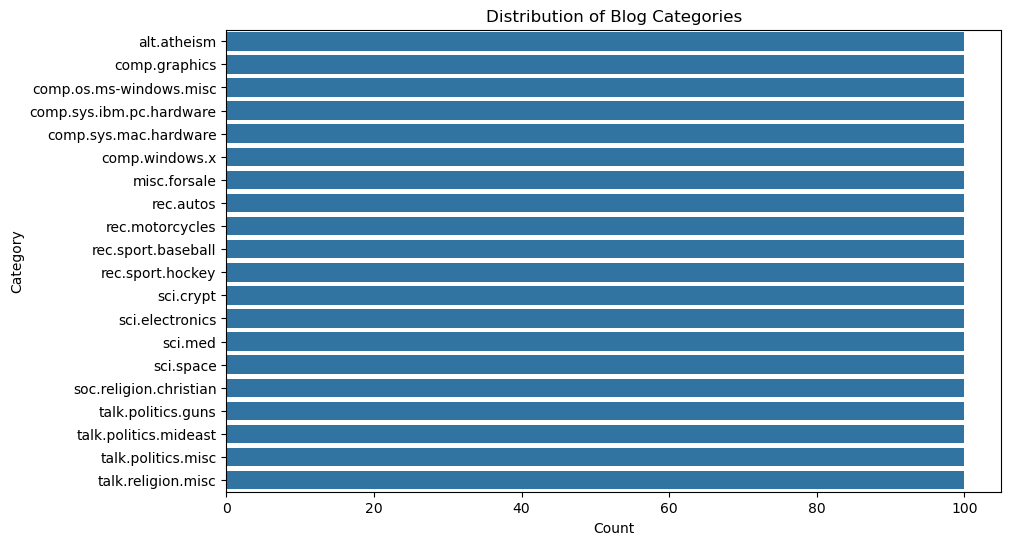

In [49]:
#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories (labels)
plt.figure(figsize=(10,6))
sns.countplot(y='Labels', data=df)
plt.title('Distribution of Blog Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


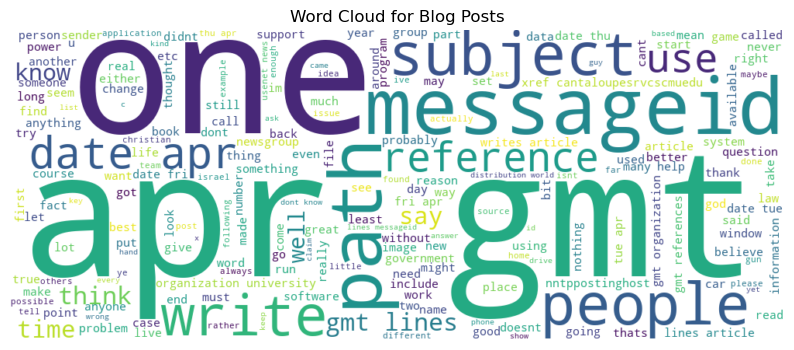

In [56]:
#wordcloud for text data

from wordcloud import WordCloud

# Combine all the cleaned blog data into one long string
all_text = ' '.join(df['Cleaned_Data'])

# Generate the wordcloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_text)

# Plot the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Blog Posts')
plt.show()


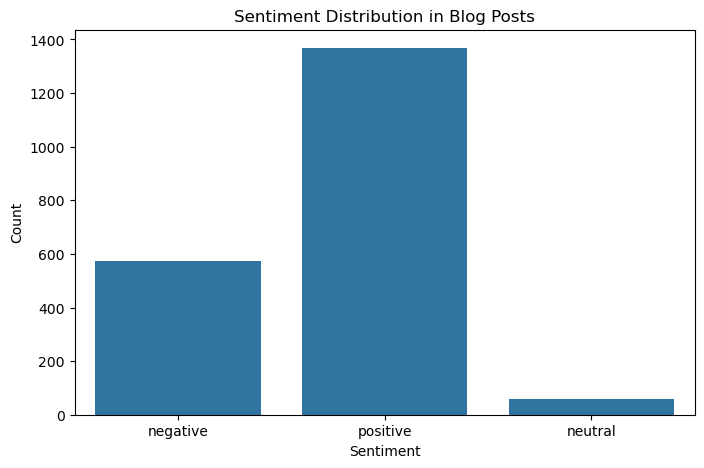

In [62]:
#sentiment distribution

# Plot the sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [12]:
# Naive Bayes Model for Text Classification

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)


(1600, 5000) (400, 5000)


In [14]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8425
              precision    recall  f1-score   support

           0       0.52      0.83      0.64        18
           1       0.73      0.89      0.80        18
           2       0.91      0.91      0.91        22
           3       0.80      0.80      0.80        25
           4       0.86      0.90      0.88        21
           5       0.95      0.84      0.89        25
           6       1.00      0.78      0.88        18
           7       0.90      1.00      0.95        18
           8       1.00      0.94      0.97        16
           9       0.84      0.89      0.86        18
          10       0.88      1.00      0.94        15
          11       0.90      1.00      0.95        19
          12       0.67      0.75      0.71        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.92      0.96      0.94        23
          16       0.85      0.79      0.81        28
          

In [39]:
#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Cleaned_Data' column
df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

# Check the distribution of sentiments
print(df['Sentiment'].value_counts())

# Sentiment analysis across categories
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_category)


Sentiment
positive    1368
negative     574
neutral       58
Name: count, dtype: int64
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   40.0      1.0      59.0
comp.graphics                 10.0      3.0      87.0
comp.os.ms-windows.misc       21.0      2.0      77.0
comp.sys.ibm.pc.hardware      17.0      3.0      80.0
comp.sys.mac.hardware         18.0      4.0      78.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0     10.0      83.0
rec.autos                     26.0      2.0      72.0
rec.motorcycles               32.0      1.0      67.0
rec.sport.baseball            26.0      3.0      71.0
rec.sport.hockey              25.0      3.0      72.0
sci.crypt                     24.0      1.0      75.0
sci.electronics               13.0      5.0      82.0
sci.med                       24.0      3.0      73.0
sci.space                     27.0      5.0      

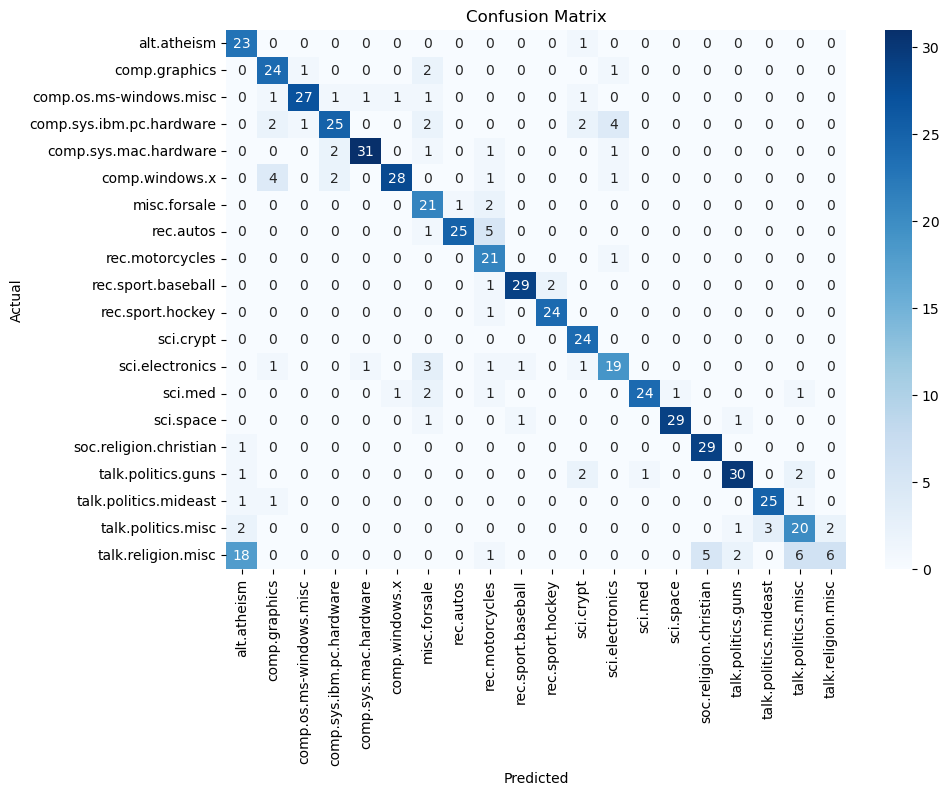

Precision: 0.8303
Recall: 0.8067
F1 Score: 0.7980


In [41]:
#Evaluation
# Display evaluation metrics like Precision, Recall, F1-Score (from classification_report above)
# Additionally, you can calculate confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optionally, you can also evaluate with other metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
